In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pathlib
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from pyproj import Proj

In [2]:
ruta_base = "../DATOS/Temp_air"

In [4]:
temp_max_mensual = pd.read_csv(f'{ruta_base}/temp_max.csv', ';', index_col='Fecha')
temp_max_mensual.index = pd.to_datetime(temp_max_mensual.index, dayfirst=True)
temp_max_mensual.head()

,CodigoEstacion,Latitud,Longitud,Altitud,Valor
Fecha,,,,,
2001-01-01,11025010,5.88,-76.08,2018,21.116129
2001-02-01,11025010,5.88,-76.08,2018,20.718519
2001-03-01,11025010,5.88,-76.08,2018,21.053333
2001-04-01,11025010,5.88,-76.08,2018,21.035714
2001-05-01,11025010,5.88,-76.08,2018,21.206897


In [5]:
temp_max_mensual.isna().any()
pd.notnull(temp_max_mensual['Valor'])

Fecha
2001-01-01    True
2001-02-01    True
2001-03-01    True
2001-04-01    True
2001-05-01    True
              ... 
2014-08-01    True
2014-09-01    True
2014-10-01    True
2014-11-01    True
2014-12-01    True
Name: Valor, Length: 6048, dtype: bool

<AxesSubplot: >

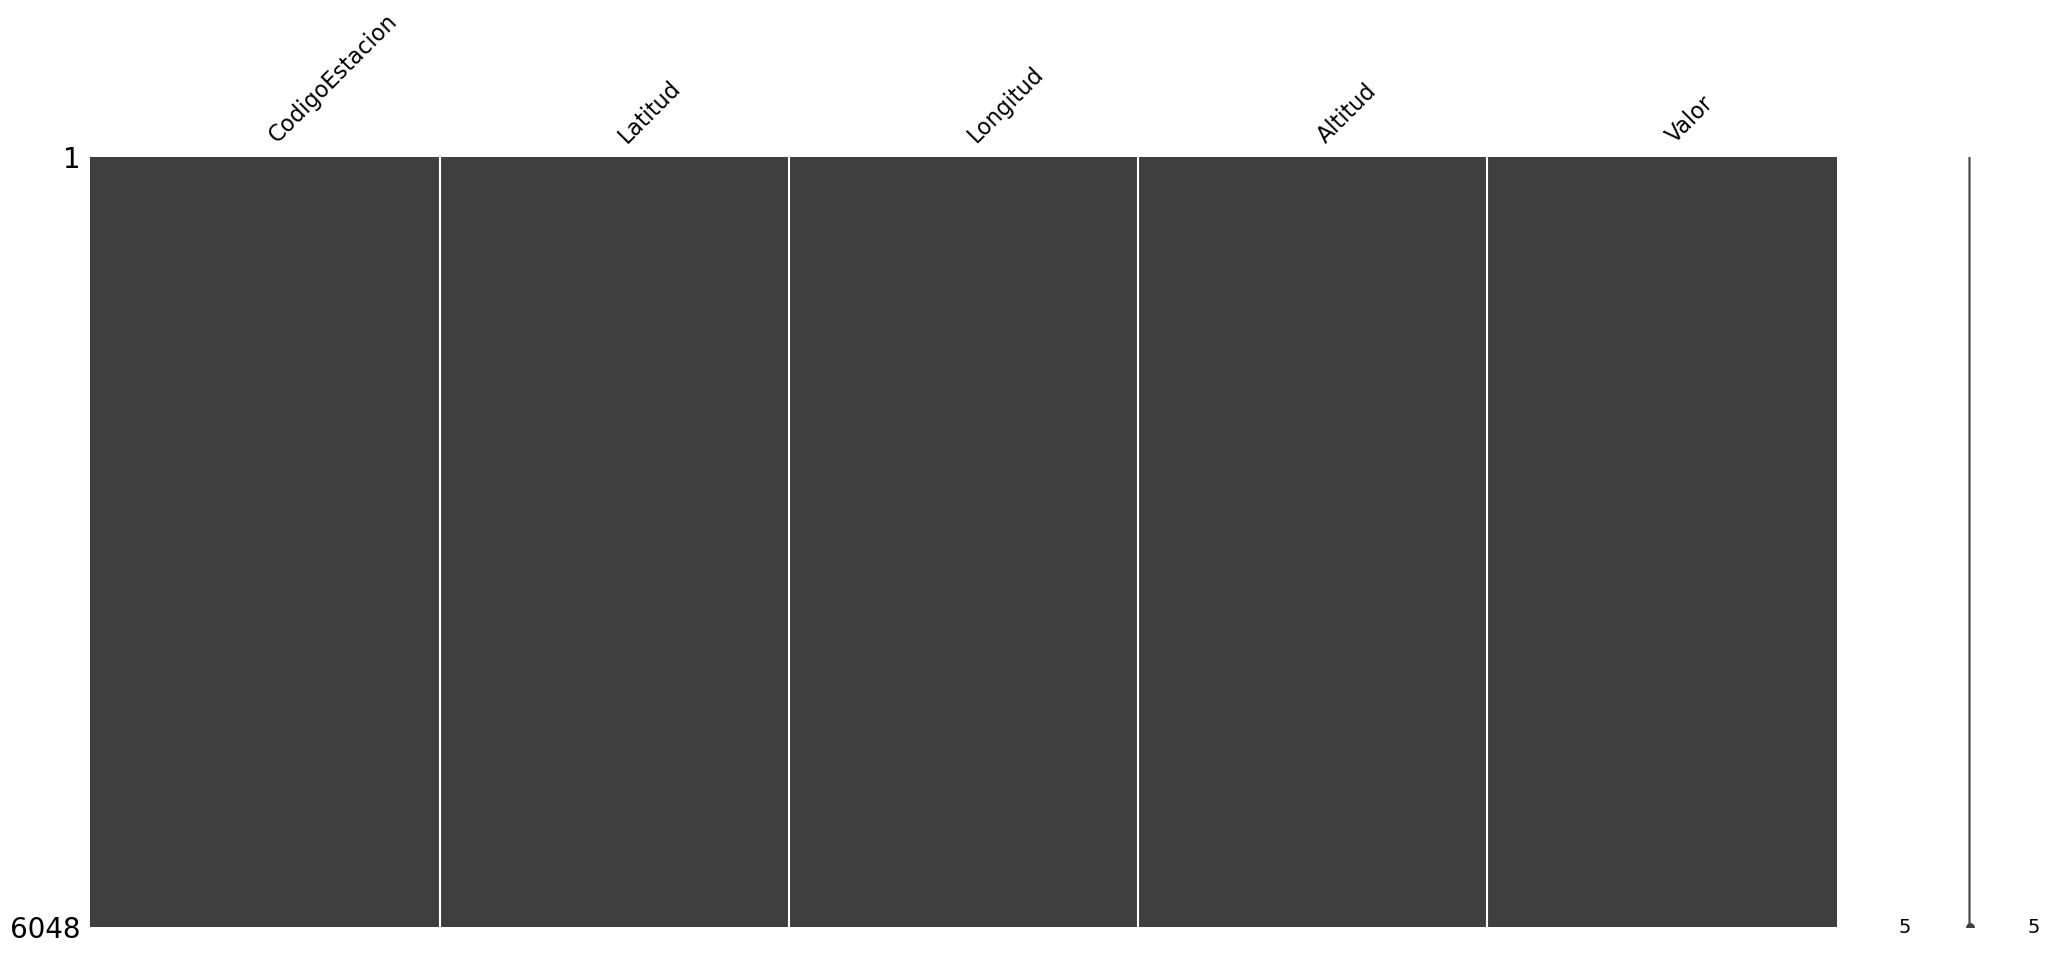

In [6]:
import missingno as msno
msno.matrix(temp_max_mensual)

In [7]:
temp_max_mensual['CodigoEstacion'].values

array([11025010, 11025010, 11025010, ..., 27045020, 27045020, 27045020],
      dtype=int64)

In [8]:
temp_clim = temp_max_mensual.groupby(by=[temp_max_mensual.index.month,'CodigoEstacion']).mean()
temp_clim

Latitud  Longitud  Altitud      Valor
Fecha CodigoEstacion                                       
1     11025010           5.88    -76.08   2018.0  21.492646
      11075020           6.30    -76.14   1833.0  22.625051
      11115020           6.76    -76.03   1294.0  27.601207
      11115040           6.78    -76.20   1396.0  25.674380
      12015020           7.83    -76.65     43.0  31.395146
...                       ...       ...      ...        ...
12    27015190           6.54    -75.15   1440.0  27.658407
      27015260           6.05    -75.62   1923.0  23.104011
      27015330           6.22    -75.59   1490.0  27.590746
      27025030           7.07    -75.15   1601.0  23.482440
      27045020           7.81    -74.94     72.0  31.630532

[432 rows x 4 columns]

In [9]:
temp_max_mensual['Climatologia'] = ''
for i in range(len(temp_max_mensual)):
    temp_max_mensual['Climatologia'][i] = temp_clim['Valor'].loc[temp_max_mensual.index.month[i],temp_max_mensual['CodigoEstacion'][i]]

In [10]:
temp_max_mensual

,CodigoEstacion,Latitud,Longitud,Altitud,Valor,Climatologia
Fecha,,,,,,
2001-01-01,11025010,5.88,-76.08,2018,21.116129,21.492646
2001-02-01,11025010,5.88,-76.08,2018,20.718519,21.440909
2001-03-01,11025010,5.88,-76.08,2018,21.053333,21.371903
2001-04-01,11025010,5.88,-76.08,2018,21.035714,21.355895
2001-05-01,11025010,5.88,-76.08,2018,21.206897,21.2771
...,...,...,...,...,...,...
2014-08-01,27045020,7.81,-74.94,72,32.600000,31.823659
2014-09-01,27045020,7.81,-74.94,72,32.200000,31.628353
2014-10-01,27045020,7.81,-74.94,72,32.725000,31.489214


In [11]:
temp_max_mensual['Anomalia'] = temp_max_mensual['Valor'] - temp_max_mensual['Climatologia']
temp_max_mensual

,CodigoEstacion,Latitud,Longitud,Altitud,Valor,Climatologia,Anomalia
Fecha,,,,,,,
2001-01-01,11025010,5.88,-76.08,2018,21.116129,21.492646,-0.376516
2001-02-01,11025010,5.88,-76.08,2018,20.718519,21.440909,-0.722391
2001-03-01,11025010,5.88,-76.08,2018,21.053333,21.371903,-0.31857
2001-04-01,11025010,5.88,-76.08,2018,21.035714,21.355895,-0.320181
2001-05-01,11025010,5.88,-76.08,2018,21.206897,21.2771,-0.070204
...,...,...,...,...,...,...,...
2014-08-01,27045020,7.81,-74.94,72,32.600000,31.823659,0.776341
2014-09-01,27045020,7.81,-74.94,72,32.200000,31.628353,0.571647
2014-10-01,27045020,7.81,-74.94,72,32.725000,31.489214,1.235786


In [12]:
temp_max_mensual['DosSTD'] = ''
temp_std = (temp_max_mensual.groupby(by=['CodigoEstacion'])['Anomalia'].std())*2
for i in range(len(temp_max_mensual)):
    temp_max_mensual['DosSTD'][i] = temp_std[temp_max_mensual['CodigoEstacion'][i]]
temp_max_mensual

,CodigoEstacion,Latitud,Longitud,Altitud,Valor,Climatologia,Anomalia,DosSTD
Fecha,,,,,,,,
2001-01-01,11025010,5.88,-76.08,2018,21.116129,21.492646,-0.376516,1.063258
2001-02-01,11025010,5.88,-76.08,2018,20.718519,21.440909,-0.722391,1.063258
2001-03-01,11025010,5.88,-76.08,2018,21.053333,21.371903,-0.31857,1.063258
2001-04-01,11025010,5.88,-76.08,2018,21.035714,21.355895,-0.320181,1.063258
2001-05-01,11025010,5.88,-76.08,2018,21.206897,21.2771,-0.070204,1.063258
...,...,...,...,...,...,...,...,...
2014-08-01,27045020,7.81,-74.94,72,32.600000,31.823659,0.776341,3.309896
2014-09-01,27045020,7.81,-74.94,72,32.200000,31.628353,0.571647,3.309896
2014-10-01,27045020,7.81,-74.94,72,32.725000,31.489214,1.235786,3.309896


In [14]:
temp_max_mensual.to_csv(f'{ruta_base}/temperatura_aire.csv', ',')